# Import all the required Packages

In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory

In [2]:
import matplotlib.pyplot as plt

# Load the dataset

In [3]:
data=tf.keras.utils.image_dataset_from_directory(
    'data',
    image_size=(256,256),
    batch_size=32,
    seed=42
)

Found 54305 files belonging to 38 classes.


# Check the Class name 

In [4]:
Label=data.class_names
Label

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

# Plot First 25 image and it's Label

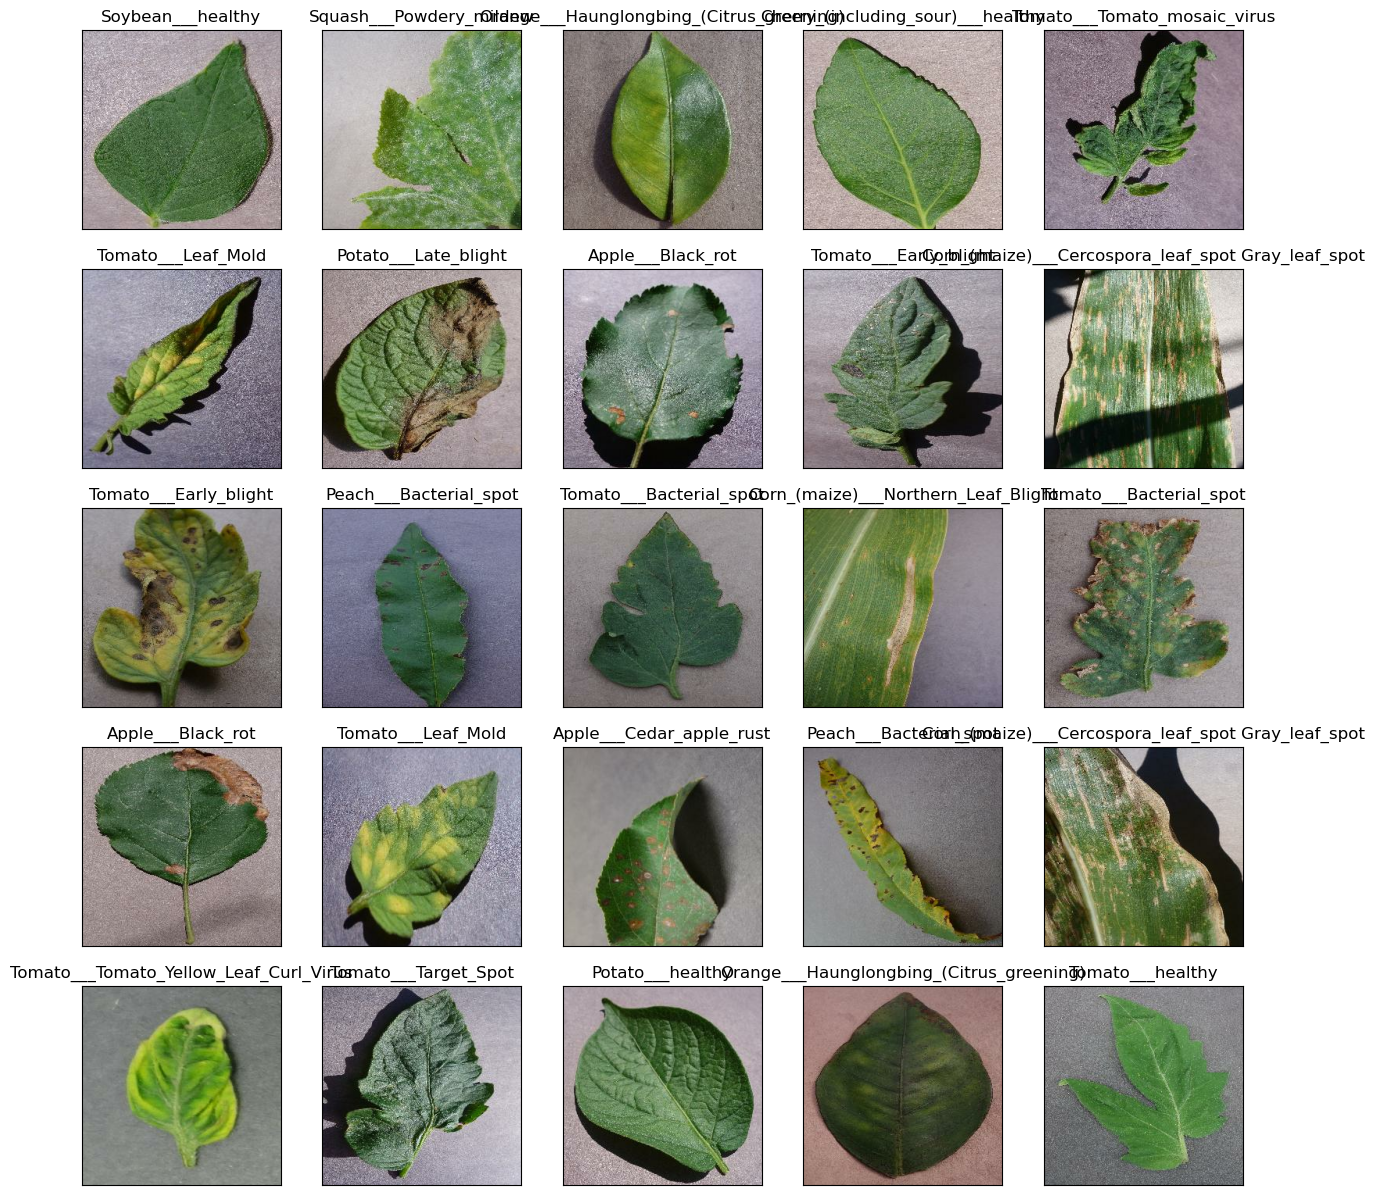

In [5]:
plt.figure(figsize=(15,15))
for image,lable in data.take(1):
    for i in range(25):
        plt.subplot(5,5,i+1).imshow(image[i].numpy().astype("uint8"))
        plt.title(Label[lable[i]])
        plt.xticks([])
        plt.yticks([])

plt.show()


        

# Check the shape of image and label

In [6]:
for image, label in data.take(1):
    print(f'image size: {image.shape}')
    print(f'label size : {label.shape}')

image size: (32, 256, 256, 3)
label size : (32,)


# Split the Data Into train_data and Validation_data

In [7]:
train_data, val_data = tf.keras.utils.image_dataset_from_directory(
    'data',
    validation_split=0.2,
    subset="both",
    seed=42,
    image_size=(256, 256),
    batch_size=32,
)

Found 54305 files belonging to 38 classes.
Using 43444 files for training.
Using 10861 files for validation.


In [8]:
# Data Augmentation of train dataset
    

In [9]:
import tensorflow as tf

# Define a data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),  # Randomly flip images
    tf.keras.layers.RandomRotation(0.2),  # Randomly rotate images by 20%
    tf.keras.layers.RandomZoom(0.1),  # Random zoom in or out
    tf.keras.layers.RandomTranslation(0.1, 0.1)  # Randomly translate images
])


In [10]:
train_data = train_data.map(lambda x, y: (data_augmentation(x, training=True), y))



In [11]:
data_resize = tf.keras.layers.Resizing(256, 256)
train_data = train_data.map(lambda x,y:(data_resize(x),y))

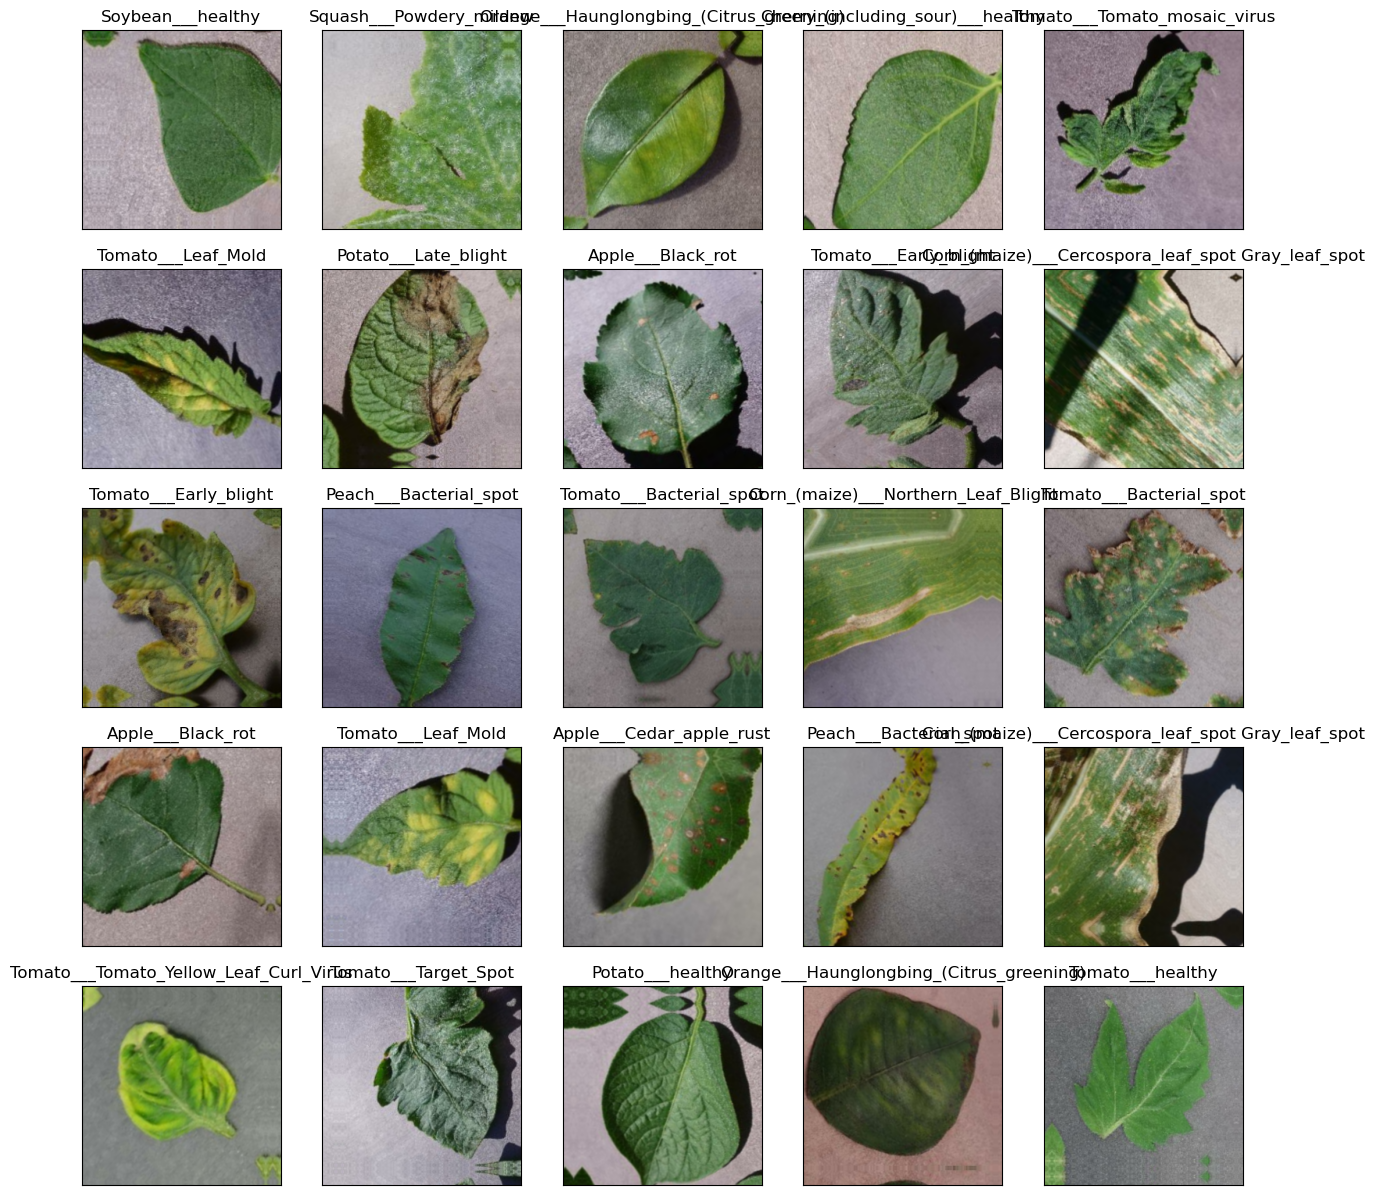

In [12]:
plt.figure(figsize=(15,15))
for image,lable in train_data.take(1):
    for i in range(25):
        plt.subplot(5,5,i+1).imshow(image[i].numpy().astype("uint8"))
        plt.title(Label[lable[i]])
        plt.xticks([])
        plt.yticks([])

plt.show()



# Normalization of Image [0 - 1]

In [13]:
train_data = train_data.map(lambda x, y: (x / 255.0, y)) 
val_data = val_data.map(lambda x, y: (x / 255.0, y)) 

# Check the normalization Doen 

# plot the Normalize image 

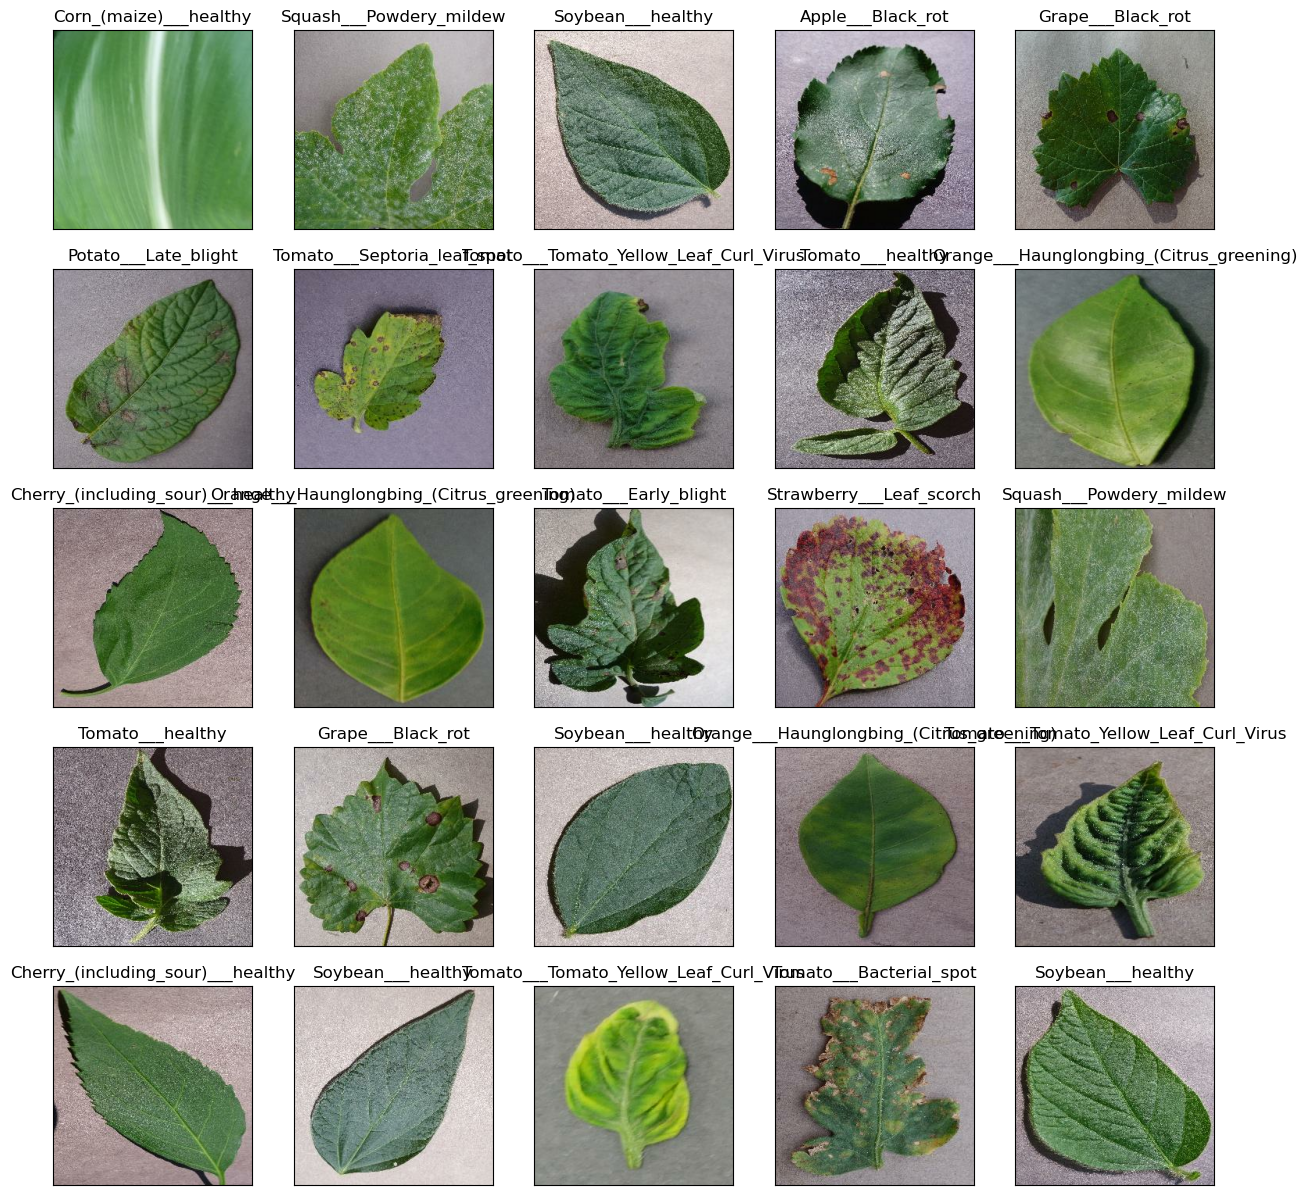

In [14]:
plt.figure(figsize=(15,15))
for image,lable in data.take(1):
    for i in range(25):
        plt.subplot(5,5,i+1).imshow(image[i].numpy().astype("uint8"))
        plt.title(Label[lable[i]])
        plt.xticks([])
        plt.yticks([])

plt.show()

In [15]:
print(len(train_data))
print(len(val_data))

1358
340


In [16]:
#train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
#val_data = val_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


# Model Developement by CNN

In [17]:
from tensorflow.keras import layers,Sequential,models
from tensorflow.keras.layers import Flatten,Dense

In [18]:
model=models.Sequential()

model.add(layers.InputLayer(shape=(256, 256, 3)))

################ CNN Layer - 1 #################################
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.BatchNormalization())
#*******************Maxpooling layer -1***************************
model.add(layers.MaxPool2D((2,2)))

################ CNN Layer - 2 #################################
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.BatchNormalization())
#*******************Maxpooling layer -2***************************
model.add(layers.MaxPool2D((2,2)))

################ CNN Layer - 3 #################################
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.BatchNormalization())
#*******************Maxpooling layer -2***************************
model.add(layers.MaxPool2D((2,2)))

################ CNN Layer - 4 #################################
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.BatchNormalization())
#*******************Maxpooling layer -4***************************
model.add(layers.MaxPool2D((2,2)))

################ CNN Layer - 5 #################################
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.BatchNormalization())
#*******************Maxpooling layer -5***************************
model.add(layers.MaxPool2D((2,2)))

################ Neural Network ##################################

model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))           
model.add(layers.Dense(38,activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,5

 Total params: 890,790 (3.40 MB)

 Trainable params: 889,958 (3.39 MB)

 Non-trainable params: 832 (3.25 KB)

In [20]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

history = model.fit(
    train_data,
    batch_size=32,
    epochs=50,
    validation_data=val_data,
    verbose=1,
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)


Epoch 1/50
 760/1358 ━━━━━━━━━━━━━━━━━━━━ 26:38 3s/step - accuracy: 0.2640 - loss: 2.9512

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch'
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
model.export("saved_model_ccn")
print("Model saved in TensorFlow SavedModel format!")


In [ ]:
model.save("cnn_model_new.h5")

print("Model saved successfully!")

In [ ]:
# Load the trained model
model = tf.keras.models.load_model('cnn_model_new.h5')  # Change the path to your model


In [ ]:
# Define test data generator (Assuming you're using Keras ImageDataGenerator)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values

test_generator = test_datagen.flow_from_directory(
    "test",  
    target_size=(256, 256),  
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Get ground truth labels
y_true = test_generator.classes  # Actual class labels
class_labels = list(test_generator.class_indices.keys())  # Class names


In [ ]:
# Predict probabilities
y_pred_probs = model.predict(test_generator)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Classification Report
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_labels))


In [ ]:
import seaborn as sns
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
